#### HeatMap of Nifty and BankNifty Monthly Returns

- HeatMap to visualise Nifty 50 and BankNifty monthly returns from Apr 2018 - Mar 2023
- Helps in figuring out the volatile and non-volatile months
- Or can determine some pattern in movement

In [159]:
## Imports: Necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [160]:
## Creating a yearly dataframe - from an input dataframe
def create_monthly_dataframe(input_df):
    ## OHLC aggregator function
    ohlc_aggregator = {
        "Open": "first",
        "High": "max",
        "Low": "min",
        "Close": "last"
    }
    ## Resampling of dataframe based on financial year - from April - March
    monthly_df = input_df.resample("M", on="Date").agg(ohlc_aggregator)
    monthly_df.reset_index(inplace=True)
    monthly_df["Year"] = monthly_df["Date"].dt.strftime("%Y")
    monthly_df["Month"] = monthly_df["Date"].dt.strftime("%B")
    return monthly_df

In [161]:
## Reading of Input Files and setting the start and end date
BASE_PATH = "F:\\StockStrategies\\Data-All\\Sectors_Spot_Data-1min"
nifty_df = pd.read_csv(f"{BASE_PATH}\\NIFTY 50_minute.csv", index_col=0)
banknifty_df = pd.read_csv(f"{BASE_PATH}\\NIFTY BANK_minute.csv", index_col=0)
start_date = "2018-01-01"
end_date = "2023-12-31"
## Converting the Date Column to a date-time index
nifty_df["Date"] = pd.to_datetime(nifty_df["Date"])
banknifty_df["Date"] = pd.to_datetime(banknifty_df["Date"])
## Slice the data upto recent March 31st - March 31, 2023
nifty_df = nifty_df[(nifty_df["Date"]>=start_date) & (nifty_df["Date"]<=end_date)]
banknifty_df = banknifty_df[(banknifty_df["Date"]>=start_date) & (banknifty_df["Date"]<=end_date)]
## Preparing the yearly dataframe
nifty_monthly_df = create_monthly_dataframe(input_df=nifty_df)
bn_monthly_df = create_monthly_dataframe(input_df=banknifty_df)

In [162]:
## Now add the column of change_percentage i.e. annual return for the year
nifty_monthly_df["Chg_pct"] = round(((nifty_monthly_df["Close"]-nifty_monthly_df["Open"])/nifty_monthly_df["Open"])*100, 3)
bn_monthly_df["Chg_pct"] = round(((bn_monthly_df["Close"]-bn_monthly_df["Open"])/bn_monthly_df["Open"])*100, 3)

In [163]:
## Filter out the required columns - Year, month, and Chg_pct
nifty_monthly_df = nifty_monthly_df[["Year","Month","Chg_pct"]]
bn_monthly_df = bn_monthly_df[["Year","Month","Chg_pct"]]

In [164]:
## Getting the order for months column of the dataframe
nifty_monthly_df['Month'] = pd.Categorical(nifty_monthly_df['Month'], nifty_monthly_df['Month'].unique())
bn_monthly_df['Month'] = pd.Categorical(bn_monthly_df['Month'], bn_monthly_df['Month'].unique())

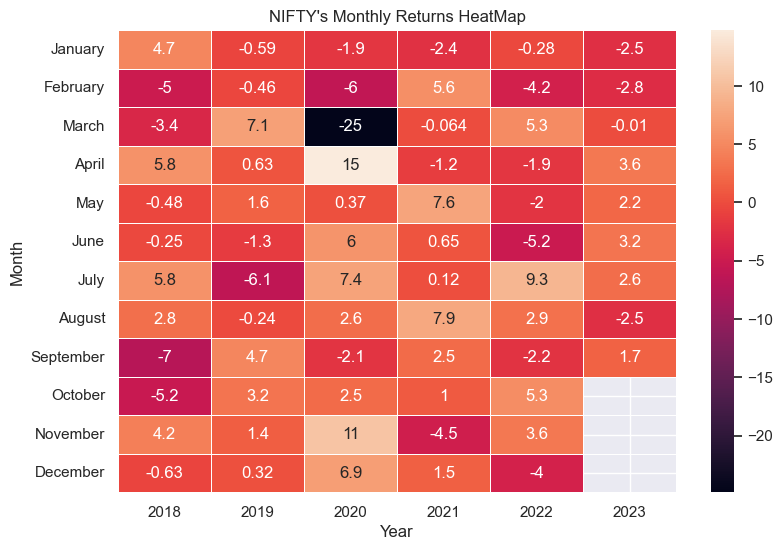

In [165]:
## Plot of Nifty's Heatmap
pivot_df = nifty_monthly_df.pivot(index="Month",columns="Year",values="Chg_pct")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_df, annot=True, linewidths=.5, ax=ax)
plt.title("NIFTY's Monthly Returns HeatMap")
plt.show()

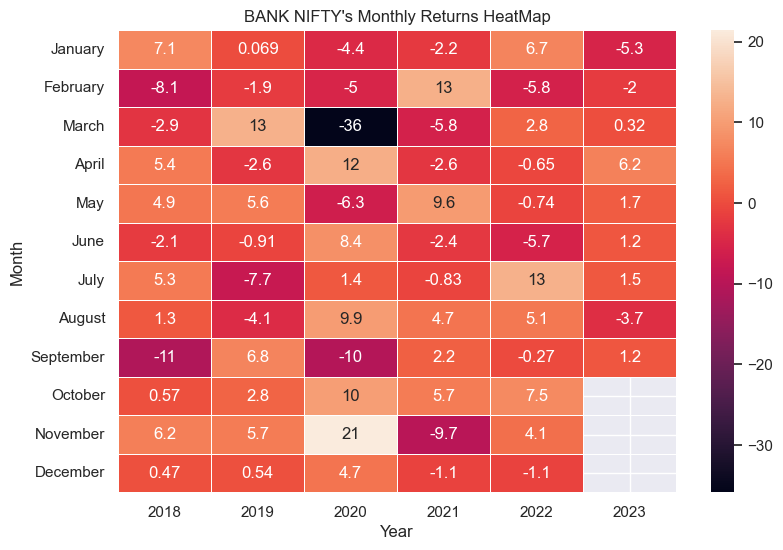

In [166]:
## Plot of Bank Nifty's Heatmap
pivot_df = bn_monthly_df.pivot(index="Month",columns="Year",values="Chg_pct")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_df, annot=True, linewidths=0.5, ax=ax)
plt.title("BANK NIFTY's Monthly Returns HeatMap")
plt.show()